<a href="https://colab.research.google.com/github/M3nnoun/machine-learning-journey/blob/main/working_with_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io

In [2]:
image=io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Couscous_of_Fes.JPG/640px-Couscous_of_Fes.JPG')

array([[[ 43,  32,  40],
        [ 58,  47,  55],
        [ 58,  51,  58],
        ...,
        [ 66,  67,  62],
        [ 69,  70,  65],
        [ 71,  72,  67]],

       [[ 54,  43,  47],
        [ 52,  41,  45],
        [ 38,  32,  36],
        ...,
        [ 74,  74,  72],
        [ 73,  73,  71],
        [ 71,  71,  69]],

       [[ 47,  37,  38],
        [ 40,  30,  31],
        [ 25,  16,  17],
        ...,
        [ 77,  77,  77],
        [ 71,  71,  73],
        [ 65,  65,  67]],

       ...,

       [[ 83,  52,  23],
        [ 78,  47,  18],
        [ 74,  43,  12],
        ...,
        [136,  98, 109],
        [134, 101, 110],
        [135, 102, 111]],

       [[ 79,  49,  21],
        [ 73,  43,  15],
        [ 71,  41,  13],
        ...,
        [136,  99, 107],
        [134, 101, 108],
        [136, 103, 110]],

       [[ 79,  52,  25],
        [ 74,  47,  20],
        [ 74,  47,  20],
        ...,
        [131,  94, 102],
        [132,  97, 103],
        [134,  99, 105]]], dtype=uint8)
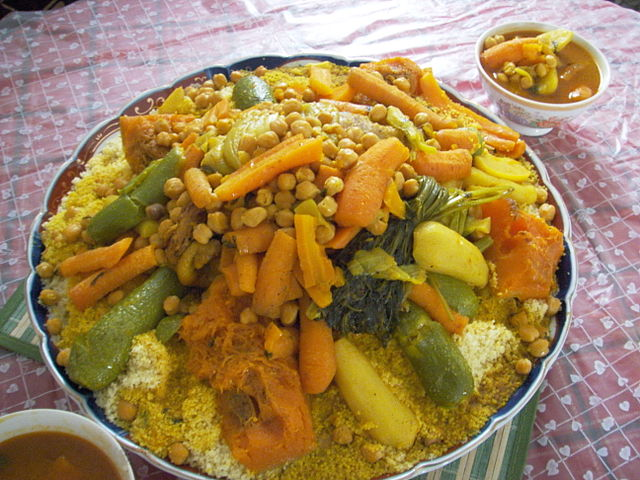

In [3]:
image

In [4]:
import numpy as np
image_data=np.array(image,dtype=np.float64)/255

In [5]:
h,w,d=original_shape=image_data.shape

In [6]:
image_array=np.reshape(image_data,(h*w,d))
image_array

array([[0.16862745, 0.1254902 , 0.15686275],
       [0.22745098, 0.18431373, 0.21568627],
       [0.22745098, 0.2       , 0.22745098],
       ...,
       [0.51372549, 0.36862745, 0.4       ],
       [0.51764706, 0.38039216, 0.40392157],
       [0.5254902 , 0.38823529, 0.41176471]])

# *Apply K-Means*

In [7]:
#Puting the data in dataframe
import pandas as pd
image_df=pd.DataFrame(image_array,columns=['Red','Green','Blue'])
image_df

Red     Green      Blue
0       0.168627  0.125490  0.156863
1       0.227451  0.184314  0.215686
2       0.227451  0.200000  0.227451
3       0.156863  0.129412  0.156863
4       0.062745  0.054902  0.074510
...          ...       ...       ...
307195  0.517647  0.360784  0.403922
307196  0.509804  0.364706  0.396078
307197  0.513725  0.368627  0.400000
307198  0.517647  0.380392  0.403922
307199  0.525490  0.388235  0.411765

[307200 rows x 3 columns]

In [8]:
#create a color column for this data, i will use for plotting
def hex_encode(rgb):
    """Transform an RGB tuple to a hex string (html color)"""
    r = int(rgb[0] * 255)
    g = int(rgb[1] * 255)
    b = int(rgb[2] * 255)
    return '#{0:02x}{1:02x}{2:02x}60'.format(r, g, b)
image_df['color']=image_df.apply(hex_encode,axis=1)

In [9]:
image_df

Red     Green      Blue      color
0       0.168627  0.125490  0.156863  #2b202860
1       0.227451  0.184314  0.215686  #3a2f3760
2       0.227451  0.200000  0.227451  #3a333a60
3       0.156863  0.129412  0.156863  #28212860
4       0.062745  0.054902  0.074510  #100e1360
...          ...       ...       ...        ...
307195  0.517647  0.360784  0.403922  #845c6760
307196  0.509804  0.364706  0.396078  #825d6560
307197  0.513725  0.368627  0.400000  #835e6660
307198  0.517647  0.380392  0.403922  #84616760
307199  0.525490  0.388235  0.411765  #86636960

[307200 rows x 4 columns]

In [10]:
# Taking sub-set of data
sub_data=image_df.sample(frac=0.05)
sub_data

Red     Green      Blue      color
121391  0.521569  0.501961  0.352941  #85805a60
32213   0.843137  0.788235  0.847059  #d7c9d860
195014  0.474510  0.478431  0.211765  #797a3660
274240  0.552941  0.431373  0.066667  #8d6e1160
164567  0.694118  0.423529  0.015686  #b16c0460
...          ...       ...       ...        ...
206885  0.396078  0.384314  0.121569  #65621f60
107646  0.733333  0.592157  0.247059  #bb973f60
217298  0.368627  0.239216  0.031373  #5e3d0860
3368    0.811765  0.701961  0.788235  #cfb3c960
4949    0.847059  0.843137  0.898039  #d8d7e560

[15360 rows x 4 columns]

In [11]:
import matplotlib.pyplot as ptl
def plot_color(df,c1,c2,c3):
  fig,ax=ptl.subplots(1,3)
  fig.set_size_inches(18,6)
  df.plot.scatter(c1,c2,c=df['color'],ax=ax[0])
  df.plot.scatter(c1,c3,c=df['color'],ax=ax[1])
  df.plot.scatter(c2,c3,c=df['color'],ax=ax[2])

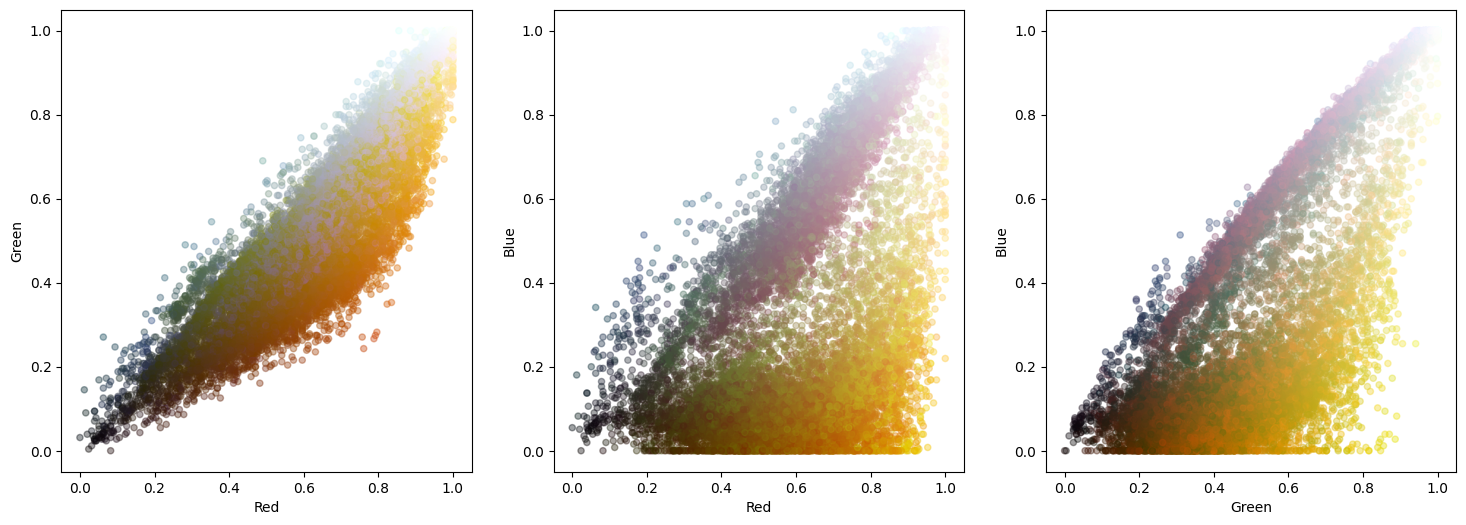

In [12]:
columns_name=list(sub_data.columns[:-1])
# print(*columns_name)
plot_color(sub_data,'Red','Green','Blue')

In [45]:
from sklearn.cluster import KMeans
centers_mobiles=KMeans(10).fit(sub_data[list(sub_data.columns[:-1])])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
dir(centers_mobiles.labels_)
set(centers_mobiles.labels_.tolist())


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [47]:
centers_mobiles.cluster_centers_

array([[0.77577283, 0.60361685, 0.14146131],
       [0.82176119, 0.78076885, 0.80411835],
       [0.45851431, 0.32691871, 0.07514756],
       [0.58854327, 0.49544965, 0.50266913],
       [0.93830532, 0.93328957, 0.95400473],
       [0.85591681, 0.75393097, 0.36661446],
       [0.69455009, 0.62395   , 0.66611575],
       [0.256694  , 0.19733286, 0.10975613],
       [0.42176548, 0.38002547, 0.34477767],
       [0.63993039, 0.42707572, 0.07998253]])

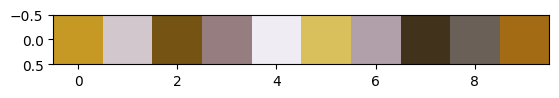

In [48]:
ptl.imshow([centers_mobiles.cluster_centers_])

In [49]:
lables=centers_mobiles.predict(image_df[list(image_df.columns[:-1])])

In [50]:
reduced=np.array([centers_mobiles.cluster_centers_[p] for p in lables]).reshape(original_shape)

In [51]:
reduced.shape

(480, 640, 3)

In [52]:
set(list(lables))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Text(0.5, 1.0, 'Reduced image')

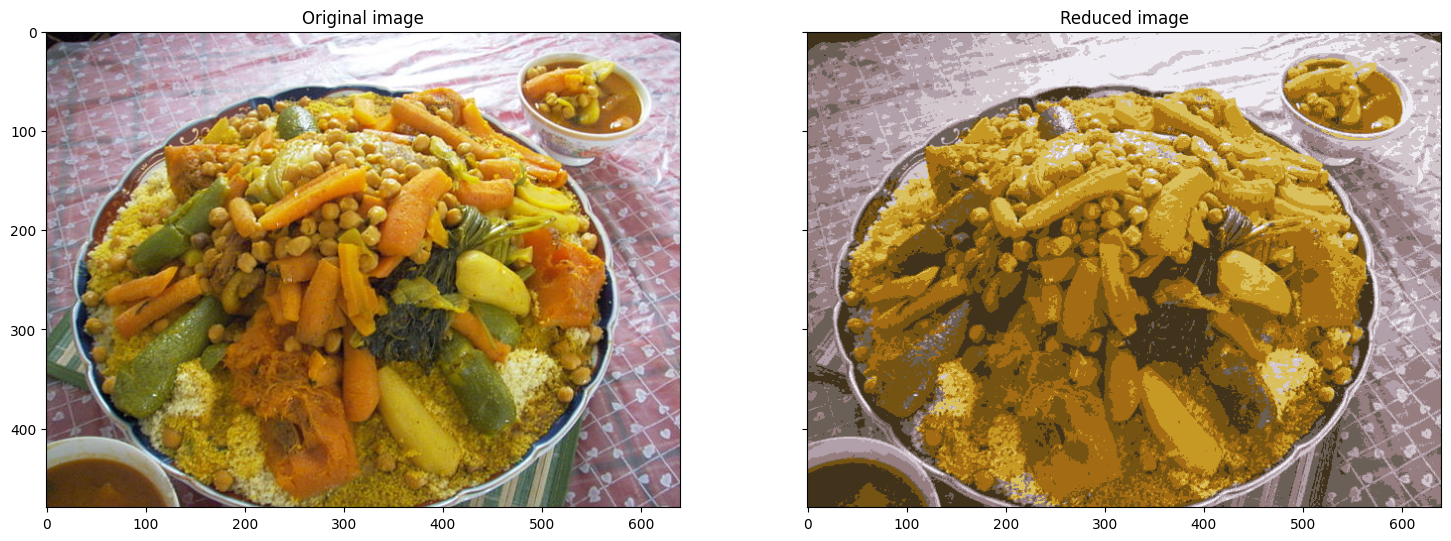

In [53]:
f,ax=ptl.subplots(1,2,sharex=True,sharey=True,figsize=(18,9))
ax[0].imshow(image)
ax[0].set_title("Original image")
ax[1].imshow(reduced)
ax[1].set_title("Reduced image")


# Like usin PCA

In [24]:
from skimage.color import rgb2lab,lab2rgb

In [25]:
image_lab=rgb2lab(image)

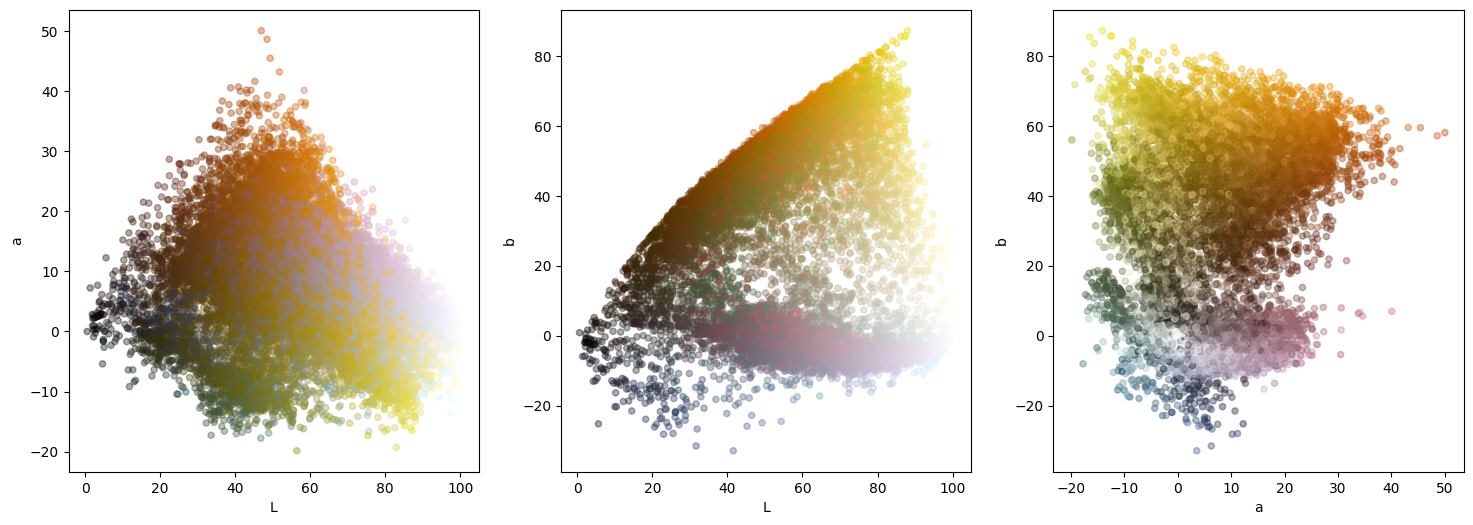

In [35]:
h,w,d=original_shape=image_lab.shape
image_lab_array=np.reshape(image_lab,(h*w,d))
pixels_lab=pd.DataFrame(image_lab_array,columns=['L','a','b'])
pixels_lab['color']=[hex_encode(p) for p in image_array]
pixels_sample=pixels_lab.sample(frac=0.05)
plot_color(pixels_sample,'L','a','b')
#pixels_lab

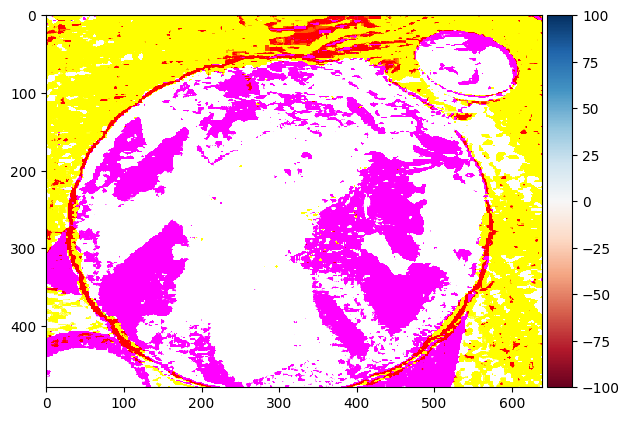

In [29]:
io.imshow(image_lab)

In [54]:
pca_centers=KMeans(10).fit(pixels_sample[list(pixels_sample.columns[:-1])])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


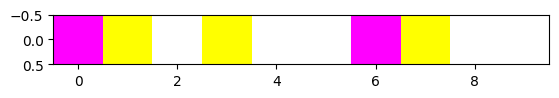

In [56]:
ptl.imshow([pca_centers.cluster_centers_])

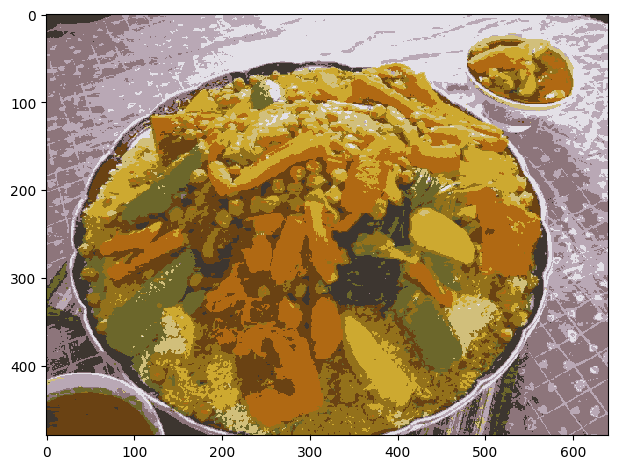

In [61]:
lables_lab=pca_centers.predict(pixels_lab[['L','a','b']])
centers_lab=lab2rgb([pca_centers.cluster_centers_])[0]
reduced_lab=np.array([centers_lab[p] for p in lables_lab]).reshape(original_shape)
io.imshow(reduced_lab)

Text(0.5, 1.0, 'Reduced lab image')

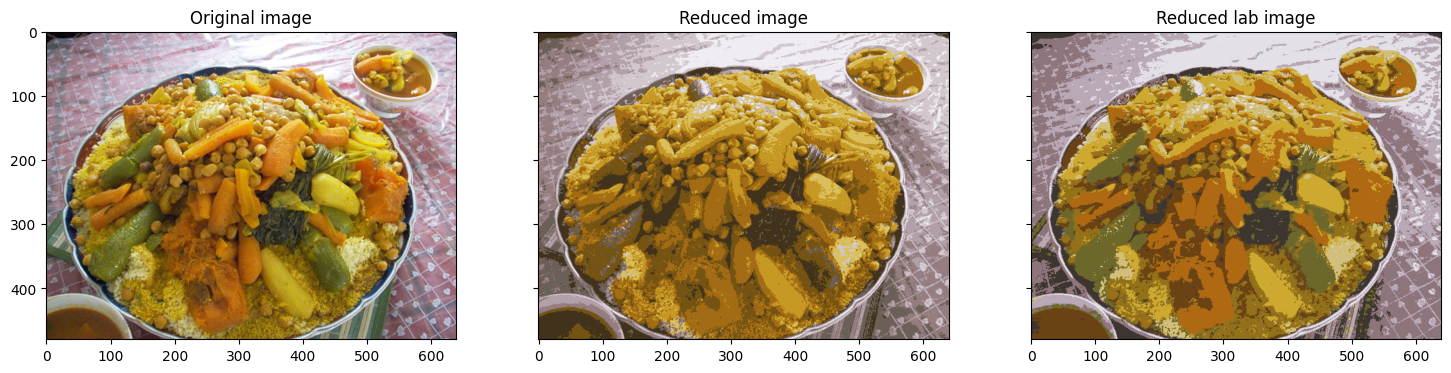

In [62]:
f,ax=ptl.subplots(1,3,sharex=True,sharey=True,figsize=(18,9))
ax[0].imshow(image)
ax[0].set_title("Original image")
ax[1].imshow(reduced)
ax[1].set_title("Reduced image")
ax[2].imshow(reduced_lab)
ax[2].set_title("Reduced lab image")
